# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [206]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection

from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 2. Collect and load data

In [207]:
df=pd.read_csv('bigcity.csv',index_col=0)
df.head()

,u,x
Unnamed: 0,,
1,4.927254,4.962845
2,4.532599,4.644391
3,4.110874,4.234107
4,5.187386,5.560682
5,3.871201,4.317488


In [208]:
# Checking the head of the data
df.head()

,u,x
Unnamed: 0,,
1,4.927254,4.962845
2,4.532599,4.644391
3,4.110874,4.234107
4,5.187386,5.560682
5,3.871201,4.317488


In [209]:
# Checking the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   u       49 non-null     float64
 1   x       49 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [210]:
# Checking data Types 
df.dtypes

u    float64
x    float64
dtype: object

# 3. Explore numeric variables - five number summary

In [211]:

df.describe()

,u,x
count,49.000000,49.000000
mean,4.257463,4.574991
std,0.911286,0.671793
min,0.693147,3.828641
25%,3.761200,4.060443
50%,4.158883,4.369448
75%,4.787492,4.867534
max,6.228511,6.452049


In [212]:
# As there are only three cloumns in the data frame 
# Unmaned column is a categorical because it is encoded  from the name of the cities
# u and x is a the numerical column in the data frame 

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

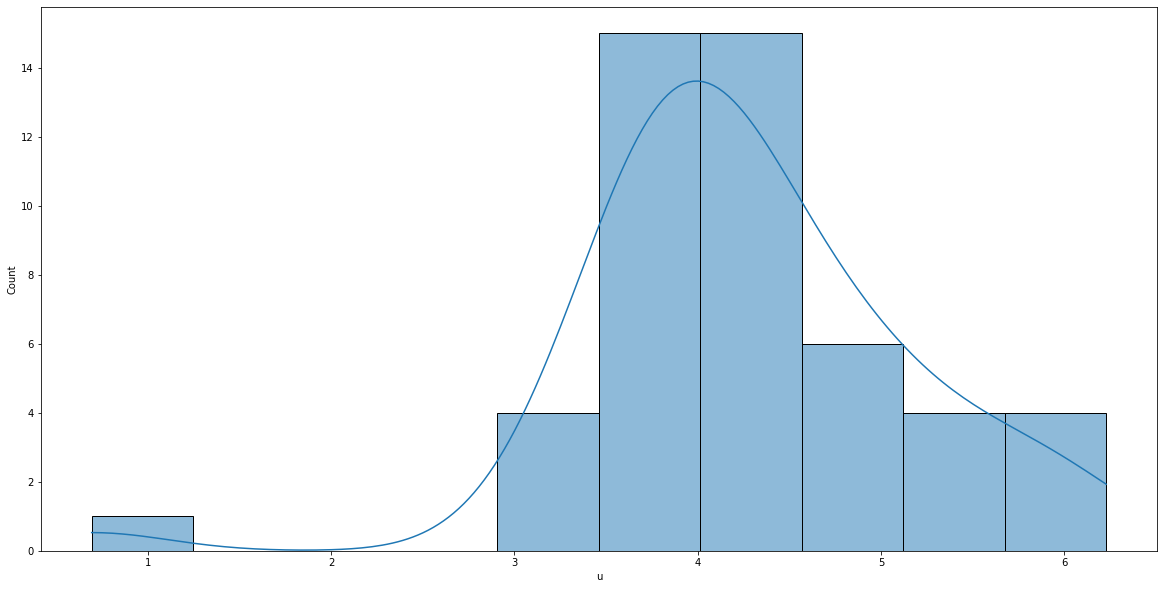

In [213]:
# 3a:
plt.rcParams["figure.figsize"]=[20,10]
sns.histplot(df.u,kde=True)
plt.tight_layout
plt.show()


In [214]:
df.u.skew()

-0.6857960088745361

In [215]:
# As we can see that the column U is positively skewed 

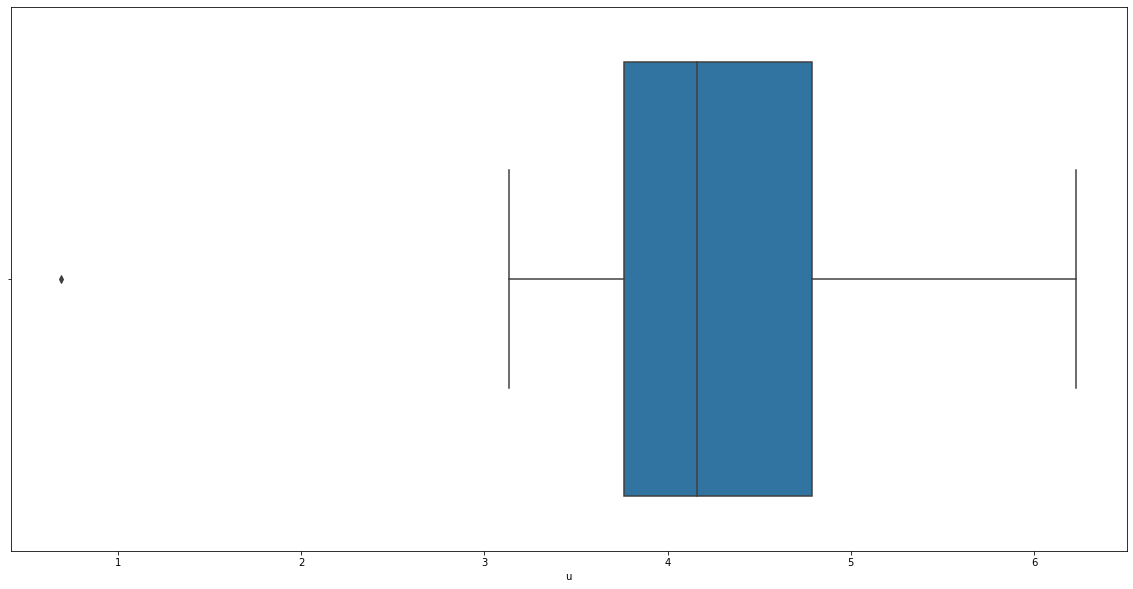

In [216]:
sns.boxplot(df.u)
plt.show()

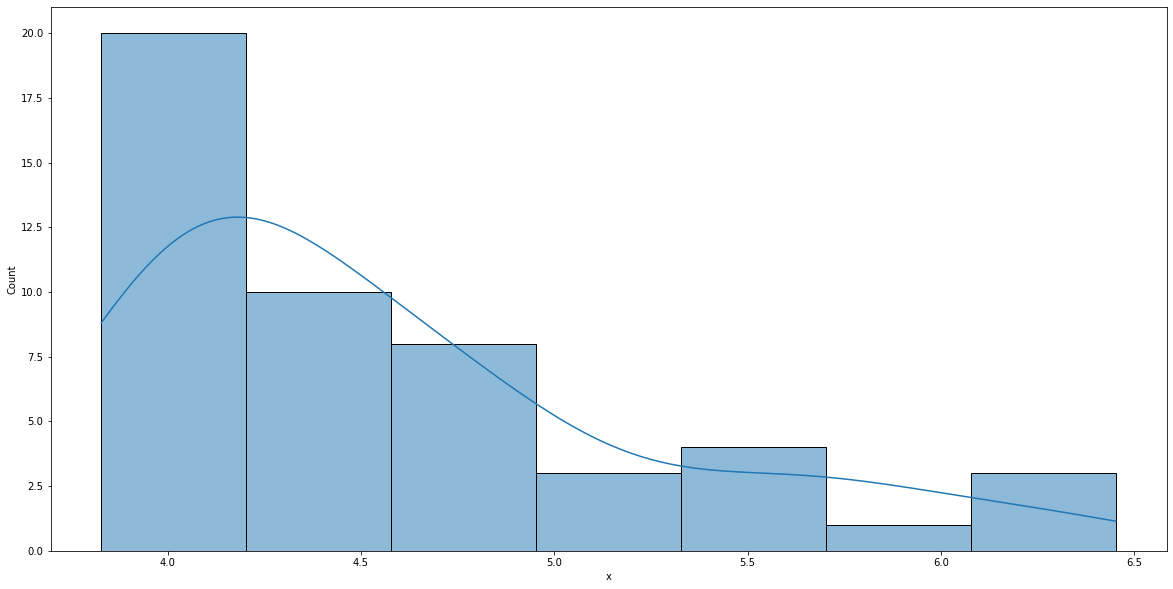

In [217]:
sns.histplot(df.x,kde=True)
plt.tight_layout
plt.show()



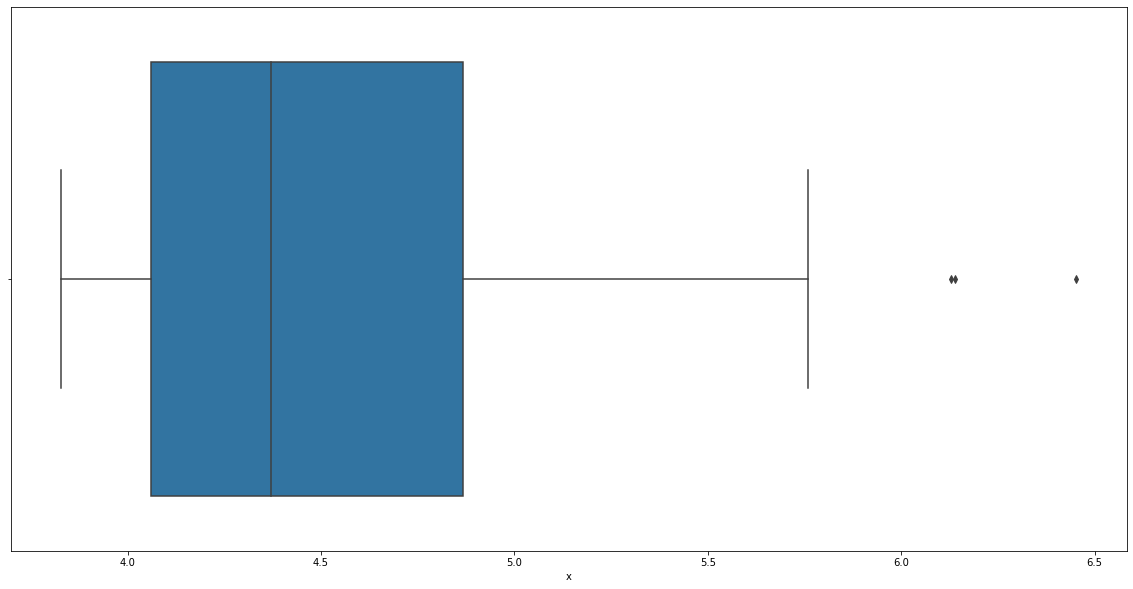

In [218]:
sns.boxplot(df.x)
plt.show()

In [219]:
print('Variance of x:',np.var(df.x))
print('Standard deviation of x:',np.std(df.x))

Variance of x: 0.44209615012058284
Standard deviation of x: 0.6649031133335013


In [220]:
print('Variance of u:',np.var(df.u))
print('Standard deviation of u:',np.std(df.u))

Variance of u: 0.8134944327504322
Standard deviation of u: 0.9019392622291327


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

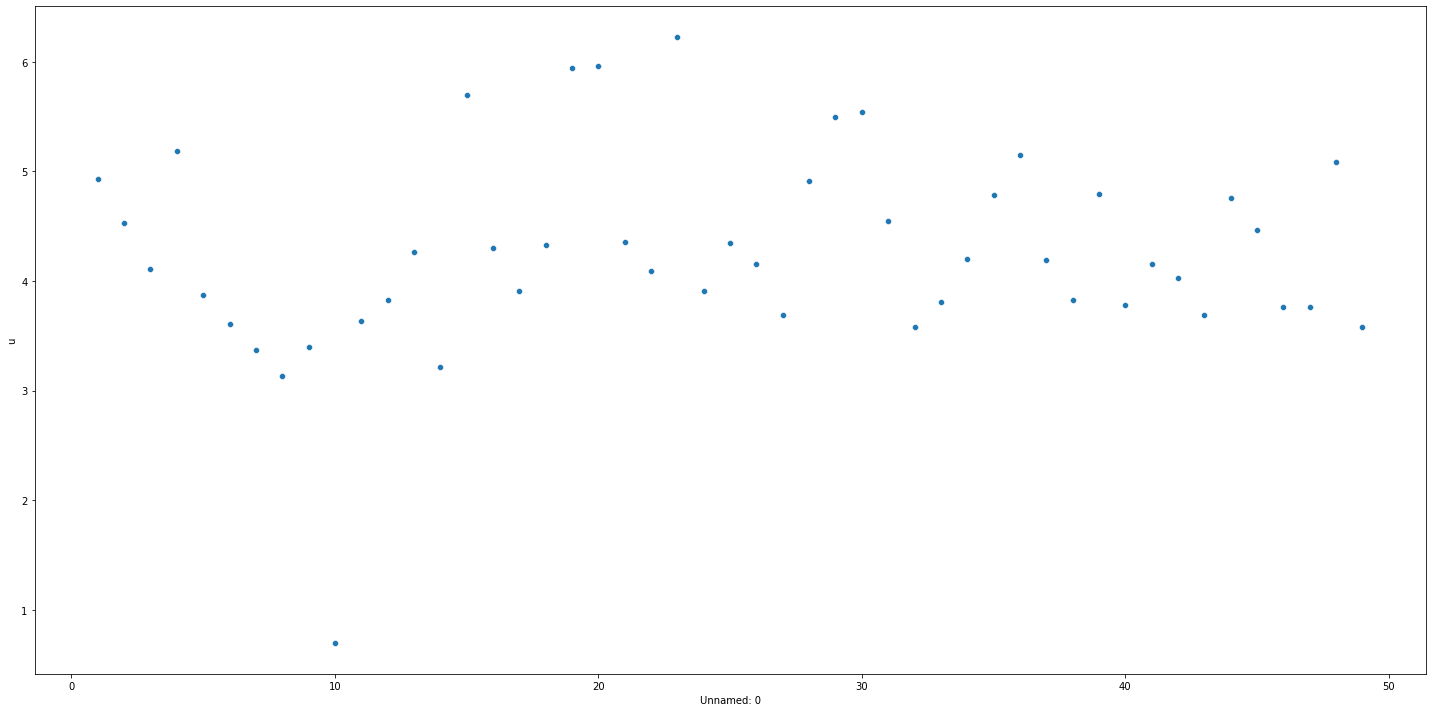

In [221]:
sns.scatterplot(x="Unnamed: 0", y="u", data=df)
plt.tight_layout()
plt.show()


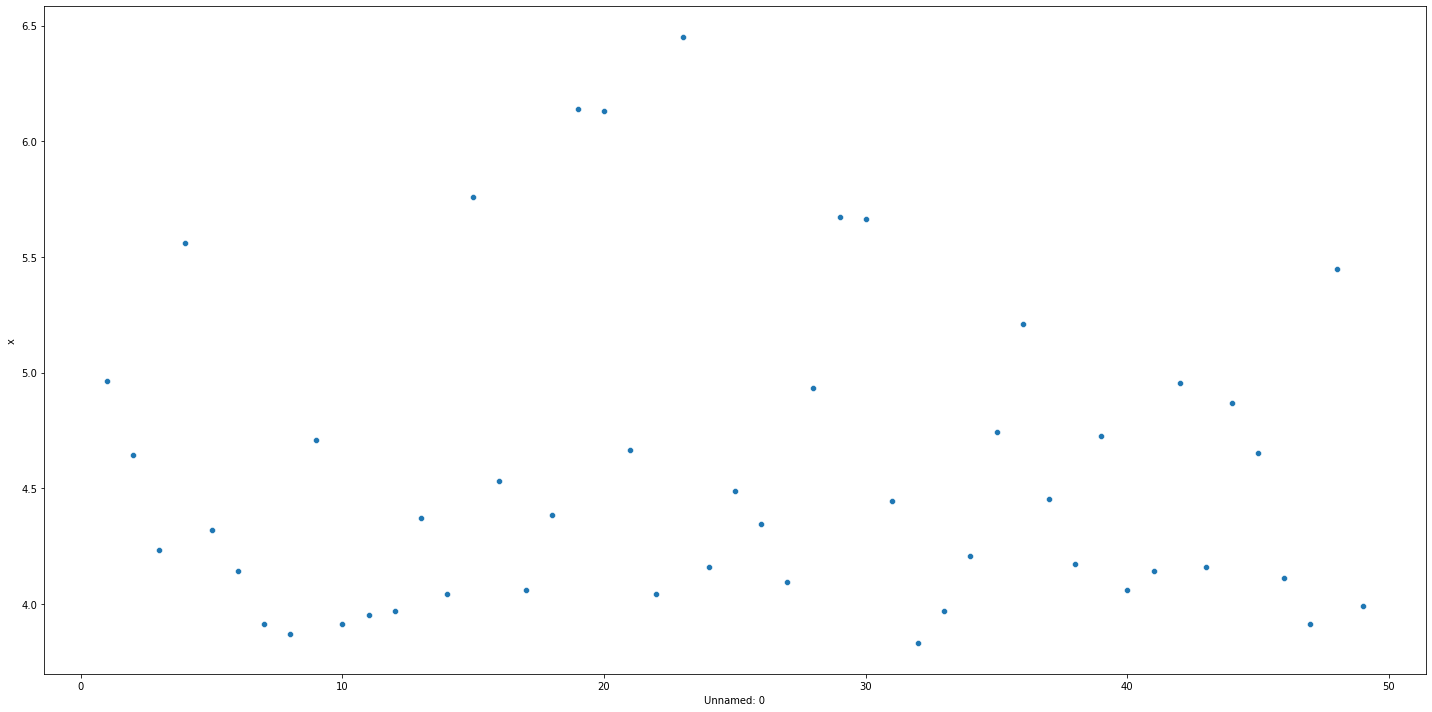

In [222]:
sns.scatterplot(x="Unnamed: 0", y="x", data=df)
plt.tight_layout()
plt.show()

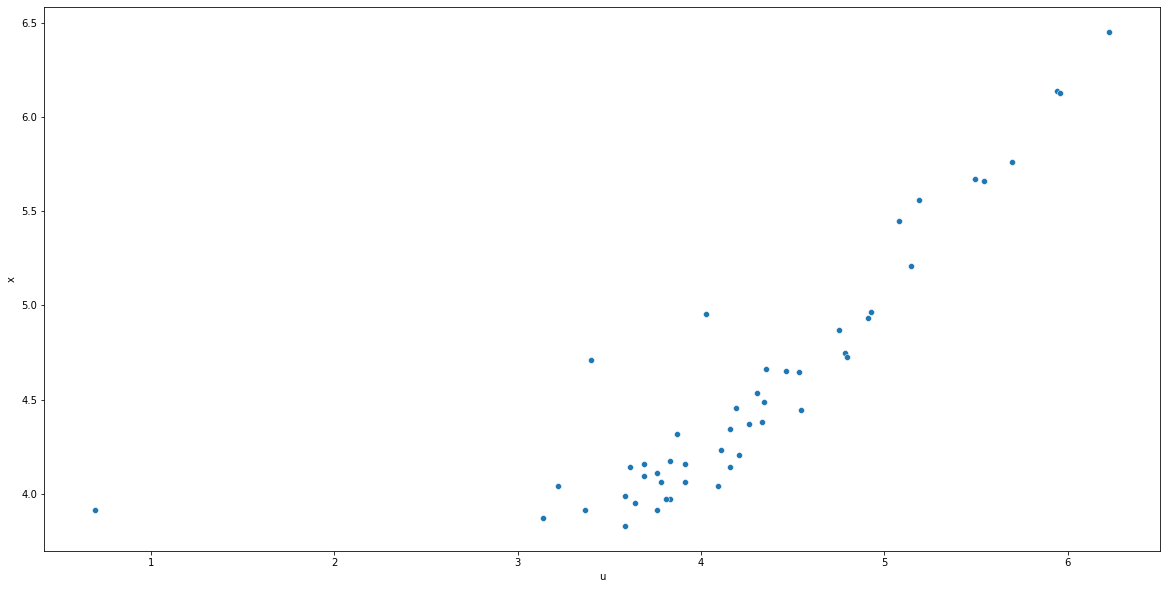

In [223]:
sns.scatterplot(x='u',y='x',data=df)
plt.show()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [224]:
df.shape

(49, 2)

<AxesSubplot:xlabel='u', ylabel='Count'>

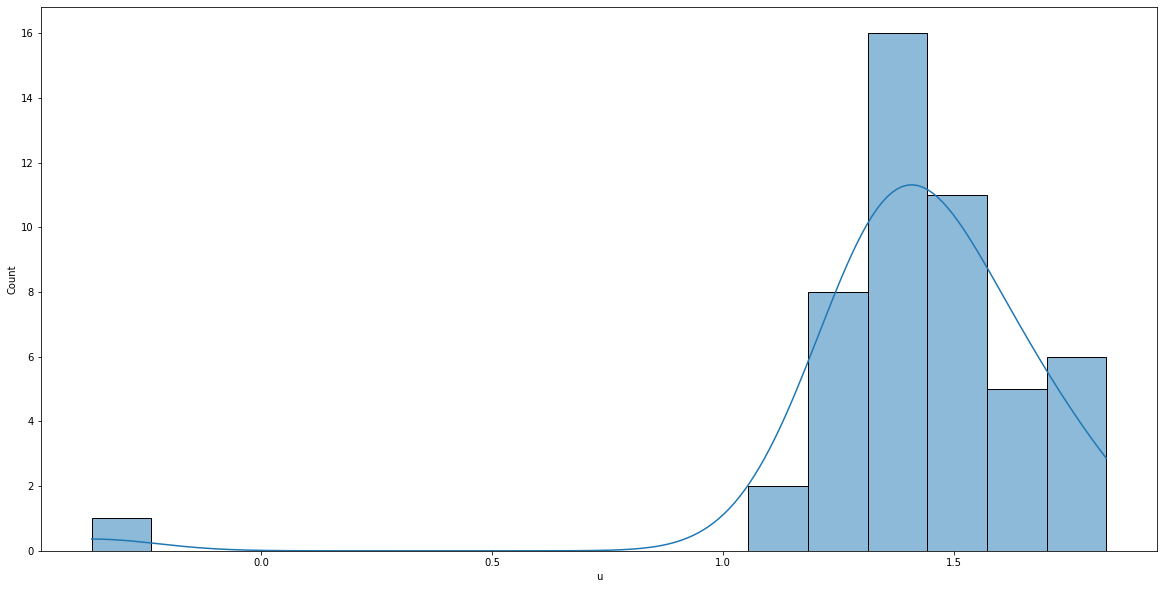

In [225]:
sns.histplot(np.log(df.u),kde=True)

In [226]:
np.log(df.u).skew()

-3.9985535138894823

In [227]:
# As we can see that we have applied the lograthmic Transformation on the column u as the skewness is reduced to some extent 

<AxesSubplot:xlabel='x', ylabel='Count'>

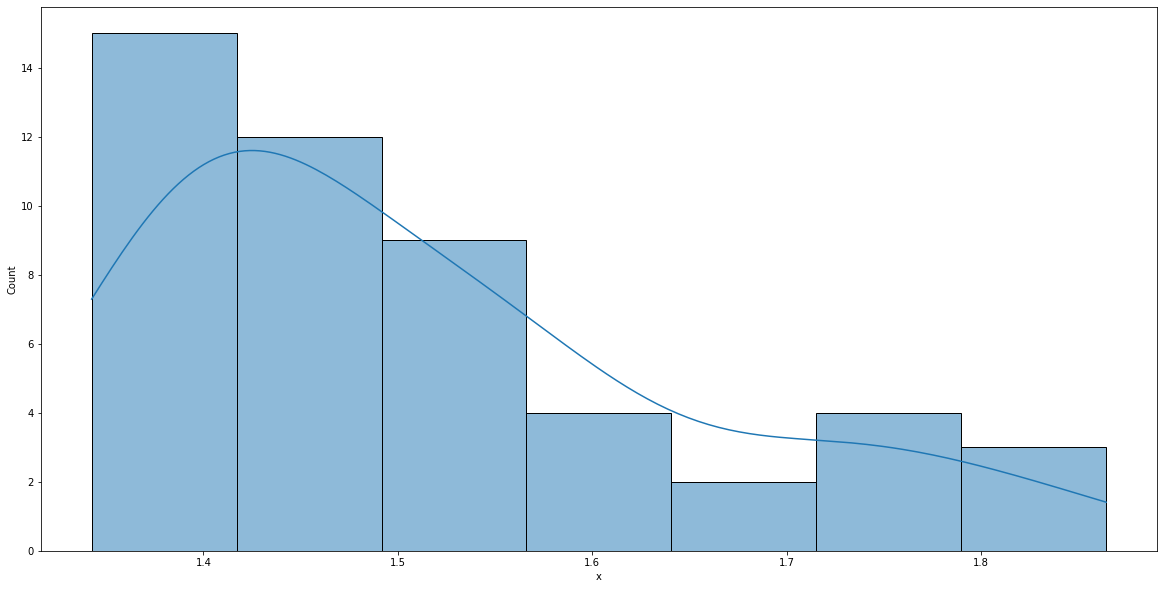

In [228]:
sns.histplot(np.log(df.x),kde=True)

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [229]:
df.isnull().sum()

u    0
x    0
dtype: int64

In [230]:
df.corr()

,u,x
u,1.000000,0.842586
x,0.842586,1.000000


In [231]:
# U and x is having good correlation 

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [232]:
X=df.u
Y=df.x

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.80)

In [234]:
x_train.shape

(39,)

In [235]:
x_test.shape

(10,)

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [236]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [237]:
model=lr.fit(pd.DataFrame(x_train),y_train)
print('b1=',model.coef_)
print('b0=',model.intercept_)

b1= [0.58691177]
b0= 2.066126060714422


In [238]:
predictions=model.predict(pd.DataFrame(x_test))

In [239]:
predictions

array([4.60788444, 4.04243162, 4.62312975, 4.27361868, 4.73263925,
       5.0484621 , 4.95798925, 5.56319565, 4.42865235, 4.6872201 ])

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

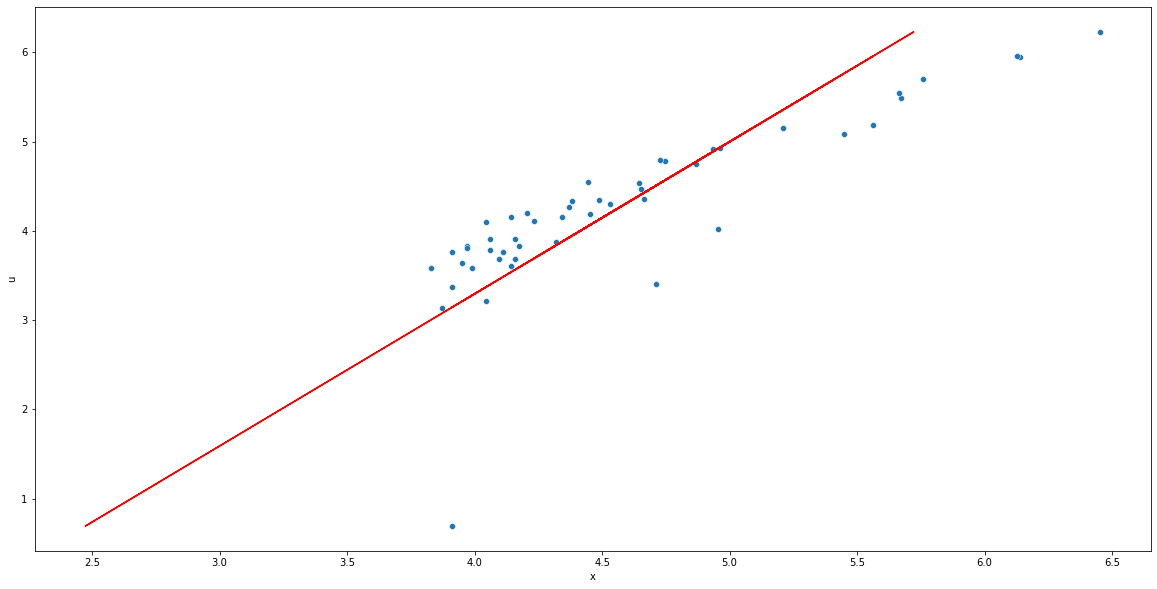

In [240]:
b1=model.coef_
b0=model.intercept_
y=b1*df.u+b0
plt.plot(y,df.u,color='red')
sns.scatterplot(df.x,df.u)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [241]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
r2=r2_score(y_test,predictions)
print('Root mean square error=',rmse)
print('r2 score=',r2)

Root mean square error= 0.3228536820901349
r2 score= 0.7473549906350929


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [242]:
# For train data
model.score(pd.DataFrame(x_train),y_train)

0.6917383983165852

In [243]:
# For test data
model.score(pd.DataFrame(x_test),y_test)

0.7473549906350929